### Limpeza e exploração dos dados do Novo-Caged para Curitiba entre Janeiro e Outubro de 2020
#### Como não foi possível acessar os dados em CSV pelo site do Novo-Caged (http://pdet.mte.gov.br/microdados-rais-e-caged) optou-se em utilizar as planilhas disponíveis em XLSX (Excel), disponível em: http://pdet.mte.gov.br/novo-caged.

##### Primeiramente importamos os pacotes Python necessários:
* Pandas: para a leitura dos dados, criação de DataFrame e manipulação dos dados;
* Numpy: criação e manipulação de arrays e matrizes, onde importamos a função concatenate() para unir arrays no mesmo eixo;
* MatplotLib: para plotar os gráficos.

In [122]:
import pandas as pd
from numpy import concatenate as conc
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format='svg'

### Visão geral da planilha: 
* A planilha possui 12 tabelas, das quais optamos por trabalhar com a última, que disponibiliza os dados consolidados por município (série com ajustes). 
* Para facilitar, decidimos excluir o cabeçalho da planilha nas três primeiras linhas.    

In [2]:
data = pd.read_excel('datasets/out_2020.xlsx', sheet_name = "Tabela 8.1", skiprows = range(0, 3))

### Tabela:

In [3]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70
0,NaN,\nUF,\nCódigo do Município,\nMunicípio,\nEstoque\n1º de Janeiro,Janeiro/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,\nAcumulado no Ano,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Estoque,Admissões,Desligamentos,Saldos,Variação Relativa (%),...,Admissões,Desligamentos,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%),NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,RO,110001,Ro-Alta Floresta D Oeste,1806,1788,55,73,-18,-0.996678,...,---,---,---,---,556,492,64,3.54374,NaN,NaN
4,NaN,RO,110002,Ro-Ariquemes,15600,15586,636,650,-14,-0.0897436,...,---,---,---,---,5365,5379,-14,-0.0897436,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5638,NaN,Fonte: Novo Caged – SEPRT/ME.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Primeiramente vamos isolar os dados de Curitiba, que mais nos interesssa. Em seguida, excluiremos a coluna do índice 'Unnamed: 0' e 3 outras colunas vazias que vieram com o dataset, 'Unnamed: 1', 'Unnamed: 69', 'Unnamed: 70' 

In [3]:
ctba = data.loc[data['Unnamed: 2']==410690]
ctba = ctba.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 69', 'Unnamed: 70'])
ctba

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
4008,410690,Pr-Curitiba,695480,702239,34953,28194,6759,0.971847,712097,40909,...,---,---,---,---,---,---,280487,282027,-1540,-0.22143


In [4]:
name = ctba.columns

* Agora seria interessante renomear as colunas, que são nossas variáveis.
* Temos 67 colunas, das quais as 3 primeiras são dados estáticos (Código do município, Nome do Município e Estoque de Janeiro)
* Ao final, temos mais 4 colunas com os totais das variáveis.
* A idéia seria criar um código que renomeie as colunas com a variavel + nome dos meses, descontando as 3 primeiras e as 4 últimas colunas.


In [104]:
# Colunas que devemos trabalhar 
name[3:63]

Index(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64'],

#### É muito provável que existam soluções mais dinâmicas em pandas, mas como não encontrei, criei a seguinte lógica que funcionou, mas que deve ser refatorada.
* Depois de criar as listas que guardam os meses, os nomes das linhas e dois contadores ('c' e 'm'), iniciamos o loop que percorrerá todas as 67 colunas (lembrando que os índices em Python iniciam sempre em zero, portanto devemos terminar em 68).
* As 3 primeiras colunas são dos dados estáticos, que são renomeadas manualmente (neste ponto comecei a refatorar o código criando a função 'name_col' que renomearia todas as colunas, mas é preciso incluir uma lógica para renomear as colunas dinâmicas.
* Em seguida, o loop entra nas colunas de variáveis dinâmicas, onde entra em jogo nosso primeiro contador 'm', que irá incluir o nome dos meses sempre de cinco em cinco variáveis. 
* A baixo segue impresso os índices que permitiram renomar as variáveis: conjunto: 3,4,5,6,7 (que são trazidos pelo loop) combina com (0,1,2,3,4) trazidos pelo contador 'c' (que aplica o nome da variável contido na lista 'new_name') e conjunto:(0,0,0,0,0) que corresponde ao mês, contido na variável 'mes' e trazido palo contador 'm'. 

In [108]:
#name = ['Unnamed: '+str(n) for n in range(2,71)]

# Função 
def name_col(col, str_):
    name_col = ctba.rename(columns={name[col]:str_}, inplace=True)
    return name_col

mes = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
new_name = ['estoque', 'adm', 'desl', 'saldos', 'var']
c = 0
m = 0

for col in range(0,68):    
    if col == 0:
        name_col(col, 'cod')        
    elif col == 1:
        name_col(col, 'municipio')        
    elif col == 2:
        name_col(col, 'estoque_1_jan')     
    elif col < 63:
        if m <= 12:
            if c <= 4:
                #print(col, c, m)
                ctba.rename(columns={name[col]:new_name[c]+"_"+mes[m]}, inplace=True)
                c = c + 1
            else:
                c = 0
                m += 1
                #print(col, c, m)
                ctba.rename(columns={name[col]:new_name[c]+"_"+mes[m]}, inplace=True)
                c += 1
                
    elif col == 63:
        
        ctba.rename(columns={name[col]:'adm_ano'}, inplace=True)
    elif col == 64:
        
        ctba.rename(columns={name[col]:'des_ano'}, inplace=True)
    elif col == 65:
        
        ctba.rename(columns={name[col]:'saldos_ano'}, inplace=True)
    elif col == 66:
        
        ctba.rename(columns={name[col]:'var_ano'}, inplace=True)
    else:
        break

3 0 0
4 1 0
5 2 0
6 3 0
7 4 0
8 0 1
9 1 1
10 2 1
11 3 1
12 4 1
13 0 2
14 1 2
15 2 2
16 3 2
17 4 2
18 0 3
19 1 3
20 2 3
21 3 3
22 4 3
23 0 4
24 1 4
25 2 4
26 3 4
27 4 4
28 0 5
29 1 5
30 2 5
31 3 5
32 4 5
33 0 6
34 1 6
35 2 6
36 3 6
37 4 6
38 0 7
39 1 7
40 2 7
41 3 7
42 4 7
43 0 8
44 1 8
45 2 8
46 3 8
47 4 8
48 0 9
49 1 9
50 2 9
51 3 9
52 4 9
53 0 10
54 1 10
55 2 10
56 3 10
57 4 10
58 0 11
59 1 11
60 2 11
61 3 11
62 4 11


## Resultado do DataSete

In [107]:
ctba

,cod,municipio,estoque_1_jan,estoque_jan,adm_jan,desl_jan,saldos_jan,var_jan,estoque_fev,adm_fev,...,var_nov,estoque_dez,adm_dez,desl_dez,saldos_dez,var_dez,adm_ano,des_ano,saldos_ano,var_ano
4008,410690,Pr-Curitiba,695480,702239,34953,28194,6759,0.971847,712097,40909,...,---,---,---,---,---,---,280487,282027,-1540,-0.22143


* Aqui guardamos o conjunto de dados nas variáveis dos meses.
* Pode haver solução mais viável

In [8]:
jan = ctba.loc[:,'estoque_jan':'var_jan'].values
fev = ctba.loc[:,'estoque_fev':'var_fev'].values
mar = ctba.loc[:,'estoque_mar':'var_mar'].values
abr = ctba.loc[:,'estoque_abr':'var_abr'].values
mai = ctba.loc[:,'estoque_mai':'var_mai'].values
jun = ctba.loc[:,'estoque_jun':'var_jun'].values
jul = ctba.loc[:,'estoque_jul':'var_jul'].values
ago = ctba.loc[:,'estoque_ago':'var_ago'].values
set_ = ctba.loc[:,'estoque_set':'var_set'].values
out = ctba.loc[:,'estoque_out':'var_out'].values
nov = ctba.loc[:,'estoque_nov':'var_nov'].values
dez = ctba.loc[:,'estoque_dez':'var_dez'].values

* Como o objeto 'values' retorna um array, e o pandas aceita criação de DataFrame com conjunto de listas, tive que concatenar todas as variáveis em um único array. 
* Não encontrei outra solução mais viável, embora exista.

In [10]:
data = conc((jan, fev, mar, abr, mai, jun, jul, ago, set_, out, nov, dez))
data

array([[702239, 34953, 28194, 6759, 0.971846782078564],
       [712097, 40909, 31051, 9858, 1.40379557387157],
       [700379, 32427, 44145, -11718, -1.64556233209801],
       [680458, 12809, 32730, -19921, -2.84431714828686],
       [671883, 16694, 25269, -8575, -1.26018064303748],
       [671987, 21511, 21407, 104, 0.0154788854607127],
       [675273, 25538, 22252, 3286, 0.488997555012225],
       [678328, 26627, 23572, 3055, 0.452409618035965],
       [682236, 29951, 26043, 3908, 0.576122465827741],
       [693940, 39068, 27364, 11704, 1.71553538658177],
       ['---', '---', '---', '---', '---'],
       ['---', '---', '---', '---', '---']], dtype=object)

* Emfim, foi possível criar o DataFrame organizado dos dados de Ctba, mas foi necessário aplicar a transposição dos dados

In [40]:
df = pd.DataFrame(data, index= mes, columns = new_name)
df = df.transpose().drop(columns=['nov', 'dez'])

In [48]:
df

,jan,fev,mar,abr,mai,jun,jul,ago,set,out
estoque,702239,712097,700379,680458,671883,671987,675273,678328,682236,693940
adm,34953,40909,32427,12809,16694,21511,25538,26627,29951,39068
desl,28194,31051,44145,32730,25269,21407,22252,23572,26043,27364
saldos,6759,9858,-11718,-19921,-8575,104,3286,3055,3908,11704
var,0.971847,1.4038,-1.64556,-2.84432,-1.26018,0.0154789,0.488998,0.45241,0.576122,1.71554


## Finalmente, isolamos os dados desejados e criamos os gráficos com a biblioteca matplotlib

In [64]:
estoque = df.loc['estoque']
admissoes = df.loc['adm']
desligamentos = df.loc['desl']
saldo = df.loc['saldos']
variacao = df.loc['var']

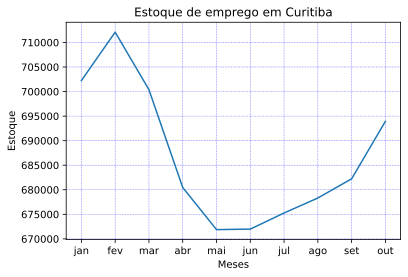

In [123]:
fig, ax = plt.subplots()

ax.plot(estoque)

ax.set(xlabel='Meses', ylabel='Estoque', title='Estoque de emprego em Curitiba')

ax.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

plt.show()

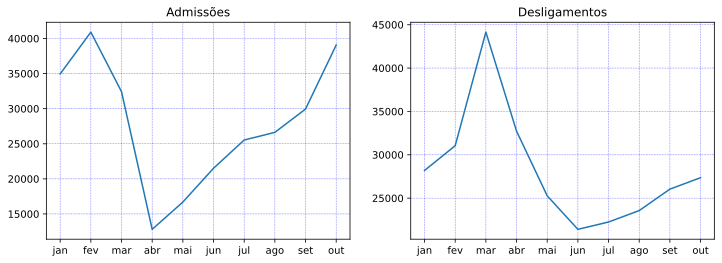

In [113]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

axes[0].plot(admissoes)
axes[0].set_title("Admissões")
axes[0].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

axes[1].plot(desligamentos)
axes[1].axis('tight')
axes[1].set_title("Desligamentos")
axes[1].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

plt.show()

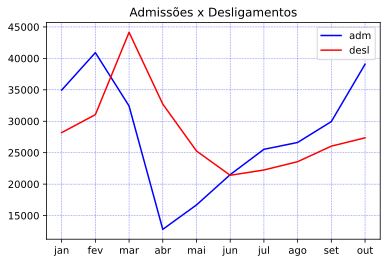

In [114]:
fig, ax = plt.subplots()
ax.plot(admissoes, color="b")
ax.plot(desligamentos, color="r")
ax.set_title("Admissões x Desligamentos")
ax.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
plt.legend(('adm', 'desl'))
plt.show();

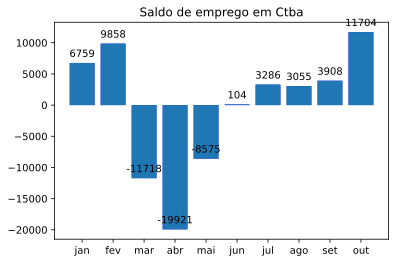

In [115]:
fig, ax = plt.subplots()
ax.bar(saldo.index, saldo, color='b')
ax.set_title('Saldo de emprego em Ctba')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(ax.bar(saldo.index, saldo))
plt.show()